# Tarea #1

# Estudiantes
    John Sánchez Cespedes 2021080092
    Luis Carlos Navarro Todd 2022212158
    Victoria Sandí Barrantes 2022146536

## Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Análisis Exploratorio de Datos (EDA) y Limpieza
Abrir los datos con pandas:

In [32]:
dataset=pd.read_csv('./house_price_regression_dataset.csv')
dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Se puede observar que el dataset se abre de forma correcta.

In [34]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


## Tratar Nulos

In [35]:
dataset.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Como se puede observar, no hay datos nulos en el dataset

## Manejar Outliers

<Axes: xlabel='Square_Footage'>

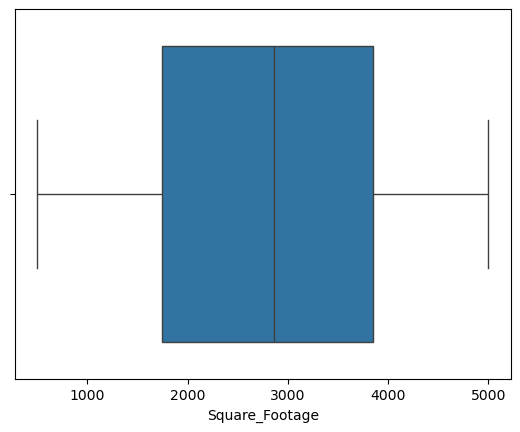

In [36]:
sns.boxplot(dataset,x='Square_Footage')

Para manejar los outliers se utilizará la técnica de IQR o rango intercuantílico

In [37]:

q1=dataset.quantile(.25)
q3=dataset.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR
UpperBound=q3+1.5*IQR
dataset=dataset[(dataset>LowerBound)&(dataset<UpperBound)]



In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Como se puede observar, no hubo instancias fuera del rango. Por lo tanto, no hay outliers

## 2. Selección de Características
Mapa de calor de la matriz de correlación de pearson:

<Axes: >

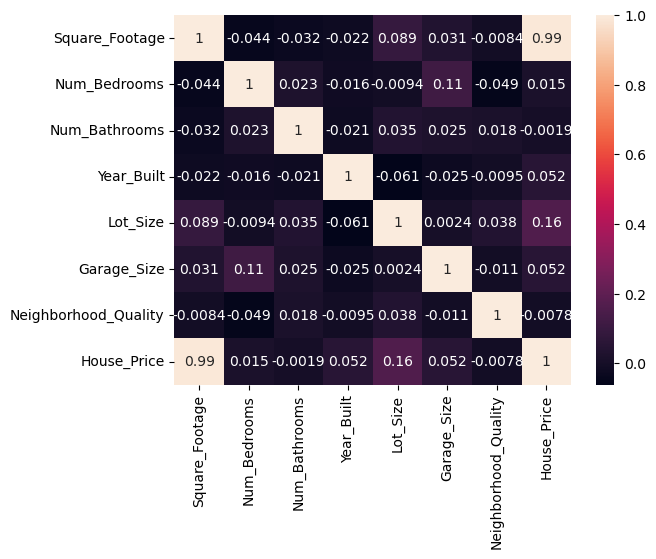

In [39]:
sns.heatmap(dataset.corr('pearson'),annot=True)

Mapa de calor de la matriz de correlación de spearman:

<Axes: >

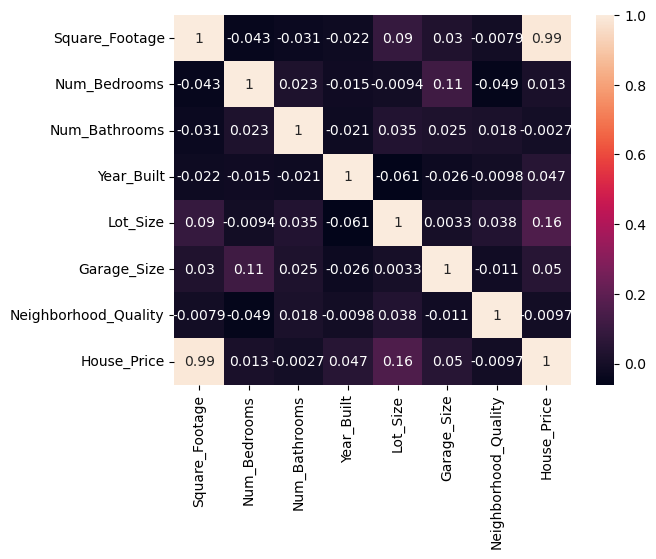

In [40]:
sns.heatmap(dataset.corr('spearman'),annot=True)

Como se puede observar, las variables con mayor correlación con el precio de la casa son los pies cuadrados, el año de construcción, el tamaño del lote y el tamaño del garaje. Todos estos datos alcanzan una correlación mayor a 0.05, por lo tanto se utilizarán para entrenar un modelo. También se hará un modelo con el tamaño del lote y los pies cuadrados únicamente. Que son los únicos 2 con correlación > 0.1.

## 3. Normalización de los datos


In [41]:
# Normalizacion de los datos
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

## 4. Creación de un dataframe


In [42]:
columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
            'Year_Built', 'Lot_Size', 'Garage_Size', 
            'Neighborhood_Quality', 'House_Price']

dataset = pd.DataFrame(data=dataset, columns=columns)
dataset.head(2)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126,-1.406552
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420,1.445699


## 5. Division de los datos
La división de datos se hace con random sampling, haciendo un shuffle de los datos.

#### División de dataset con todos los features

In [43]:
X = dataset.drop(["House_Price"], axis=1)
y = dataset["House_Price"]

# se dividen los sets (70% - 15% - 15%)

# Divide en entrenamiento (70%) y el resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)



#### División de dataset con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje

In [44]:
X1 = dataset.drop(["House_Price", "Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality"], axis=1)
y1 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X1_train, X_temp, y1_train, y_temp = train_test_split(X1, y1, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X1_val, X1_test, y1_val, y1_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

#### División de dataset con pies cuadrados y tamaño del lote

In [45]:
X2 = dataset.drop(["House_Price", "Num_Bedrooms", "Year_Built", "Num_Bathrooms", "Garage_Size", "Neighborhood_Quality"], axis=1)
y2 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X2_train, X_temp, y2_train, y_temp = train_test_split(X2, y2, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X2_val, X2_test, y2_val, y2_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)

## 6. Entrenamiento
### Implementación de Regresión Lineal

In [46]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

#### Cálculo de error

In [47]:
def MSE(y, output):
    return (output-y)**2

#### Funciones para Actualización de Parámetros

In [48]:
def derivada_L_w(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto W
    output = wx+b
    '''
    return 2*x*(output - y)

In [49]:
def derivada_L_b(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto b
    output = wx+b
    '''
    return 2*(output-y)

### Funciones de Graficación
#### Función de Gráfico de MSE

In [50]:
def plotMSE(historial_mse_epochs, historial_mse_validacion):
    # Puntos de cada MSE
    epochs, mses = zip(*historial_mse_epochs)

    plt.figure(figsize=(8, 5))
    
    # Graficar la curva de entrenamiento
    plt.plot(epochs, mses, label="Train MSE", color='red', marker='o', linestyle='-')

    # Si hay datos de validación, graficarlos también
    if historial_mse_validacion:
        epochs_val, mses_val = zip(*historial_mse_validacion)
        plt.plot(epochs_val, mses_val, label="Validation MSE", color='blue', marker='s', linestyle='--')

    # Etiquetas y formato
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'Curva de Error | Última Época {max(epochs)}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Training

In [51]:
def generar_params_iniciales(*dimensiones_w):
    w = np.random.rand(*dimensiones_w)
    b = np.random.default_rng().random()
    return w, b

In [ ]:
def entrenar(training_dataset, training_labels, validation_dataset, validation_labels, epochs = 400, alfa = 0.005, plot_cada_n=-1):
    w, b = generar_params_iniciales(*training_dataset.columns.shape)

    print(f"Valores iniciales:, B = {b:.5F}, W =", w)

    historial_error_epochs = []
    historial_error_validacion = []

    # Época
    for epoch in range(epochs):
        errores_por_instancia = []
        derivadas_w = []
        derivadas_b = []
        for (x, y) in zip(training_dataset.values, training_labels):
            # Correr el modelo por cada instancia y calcular su error y funcion de pérdida
            output = modelo(x, w, b)
            error = MSE(y, output)
            errores_por_instancia.append(error)
            derivada_w = derivada_L_w(x, y, output)
            derivadas_w.append(derivada_w)
            derivada_b = derivada_L_b(x, y, output)
            derivadas_b.append(derivada_b)

        # Cálculo de Promedios
        promedio_dw = np.mean(derivadas_w, axis=0)
        promedio_db = np.mean(derivadas_b)
        promedio_error = np.mean(errores_por_instancia)

        # Actualización de Parámetros
        w = w - alfa*promedio_dw
        b = b - alfa*promedio_db

        # Validación
        errores_validacion = []
        for (x_val, y_val) in zip(validation_dataset.values, validation_labels):
            output_val = modelo(x_val, w, b)
            errores_validacion.append(MSE(y_val, output_val))
        
        promedio_error_validacion = np.mean(errores_validacion)

        # Guardar los errores en el historial
        historial_error_epochs.append((epoch, promedio_error))
        historial_error_validacion.append((epoch, promedio_error_validacion))

        if plot_cada_n > 0 and epoch % plot_cada_n == 0:
            print(f"Época {epoch}:")
            print(f"   → Loss (Training) = {promedio_error:.5F}")
            print(f"   → Loss (Validation) = {promedio_error_validacion:.5F}")
            plotMSE(historial_error_epochs, historial_error_validacion)

    return w, b


## Testing

In [53]:
def testear(w, b, testing_dataset, testing_labels, ):
    #TODO: Esto hay que cambiarlo, por métricas de Loss y Accuracy
    errores_por_instancia = []
    for (x, y) in zip(testing_dataset.values, testing_labels):
        output = modelo(x, w, b)
        error = MSE(output, y)
        errores_por_instancia.append(error)

    promedio_error = np.mean(errores_por_instancia)
    
    print(f"Valor de función de perdida (Loss Function) para testing = {promedio_error:.5F}")


# Ejecuciones:
## Correr training con todos los features: Epochs 400 y Alfa: 0.00000003

Valores iniciales:, B = 0.88435, W = [0.59734236 0.64453671 0.04477497 0.40915861 0.02222851 0.28409464
 0.41268116]
Época 0:
   → Loss (Train) = 1.80506
   → Loss (Valid) = 1.50024


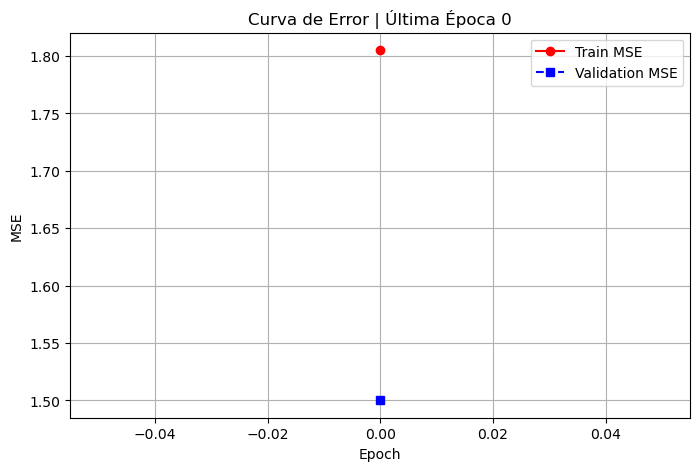

Época 50:
   → Loss (Train) = 1.14061
   → Loss (Valid) = 0.95147


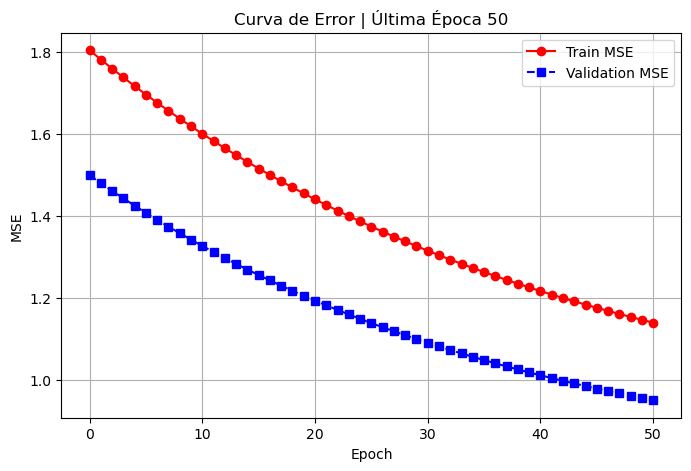

Época 100:
   → Loss (Train) = 0.94310
   → Loss (Valid) = 0.80745


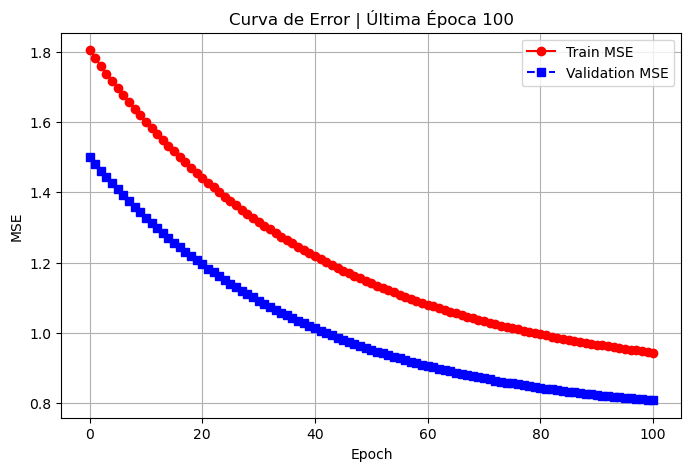

Época 150:
   → Loss (Train) = 0.88432
   → Loss (Valid) = 0.77512


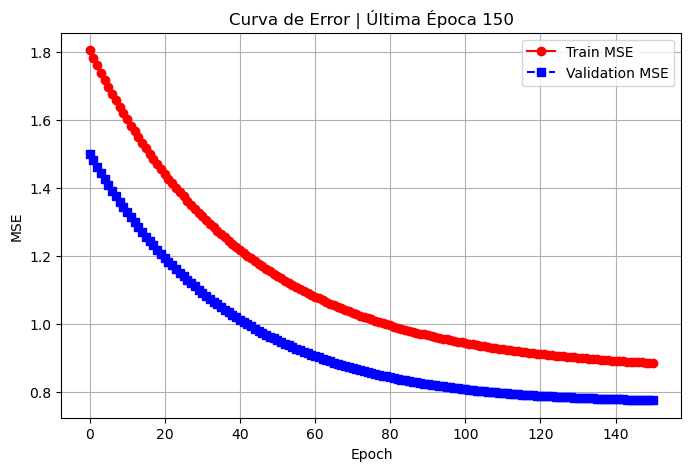

Época 200:
   → Loss (Train) = 0.86681
   → Loss (Valid) = 0.77127


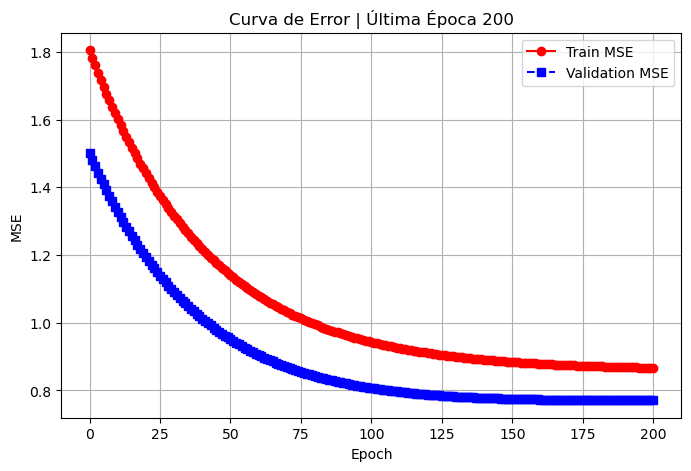

Época 250:
   → Loss (Train) = 0.86158
   → Loss (Valid) = 0.77328


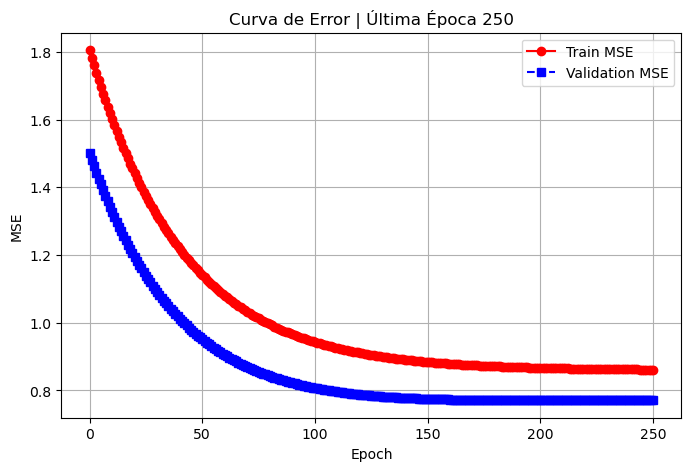

Época 300:
   → Loss (Train) = 0.86002
   → Loss (Valid) = 0.77560


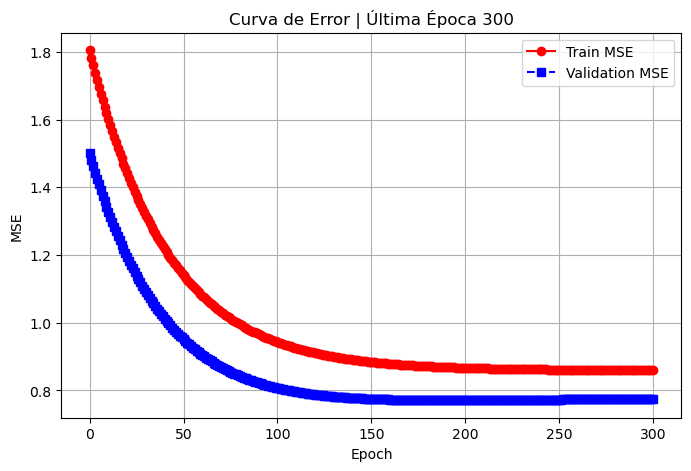

Época 350:
   → Loss (Train) = 0.85955
   → Loss (Valid) = 0.77723


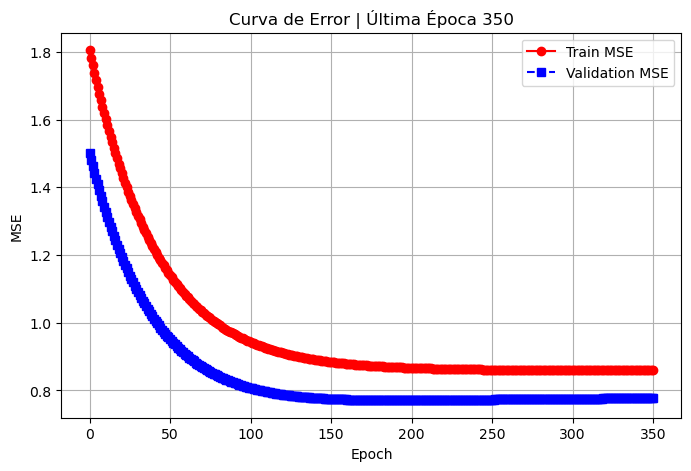

In [54]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=400, alfa=0.006, plot_cada_n=50)
# testear(w, b, X_test, y_test)

###

## Correr training con selección de features #1: Epochs 400 y Alfa: 0.0000001

Valores iniciales:, B = 0.62787, W = [0.59557977 0.77010108 0.87091049 0.42149864]
Época 0:
   → Loss (Train) = 1.50501
   → Loss (Valid) = 1.28795


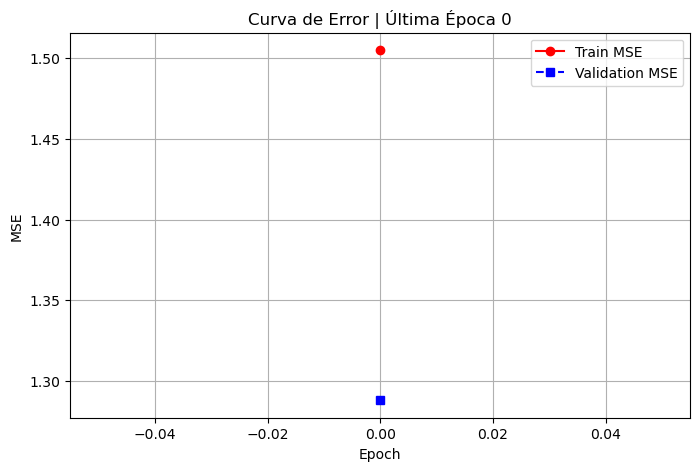

Época 50:
   → Loss (Train) = 0.97228
   → Loss (Valid) = 0.84135


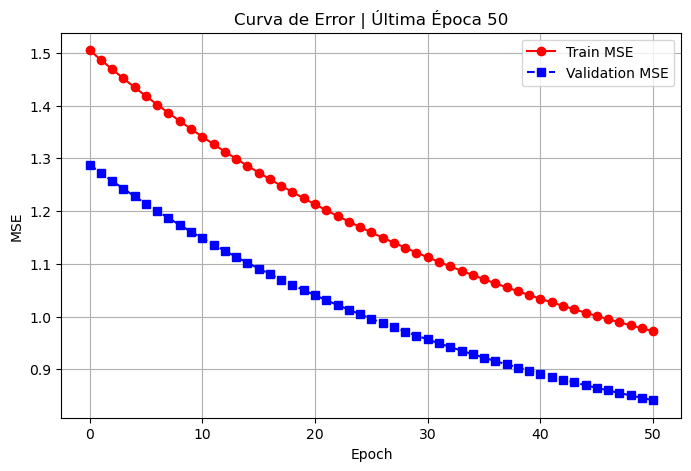

Época 100:
   → Loss (Train) = 0.81583
   → Loss (Valid) = 0.71883


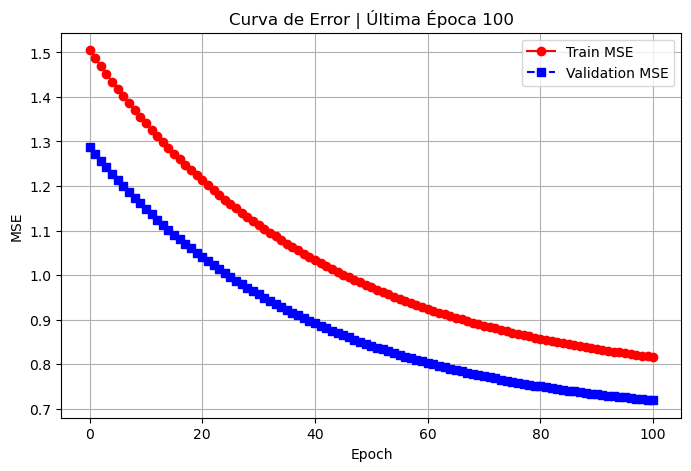

Época 150:
   → Loss (Train) = 0.76987
   → Loss (Valid) = 0.68757


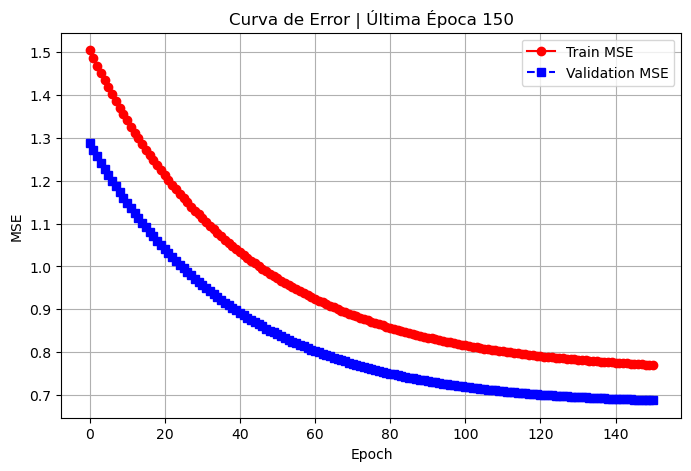

Época 200:
   → Loss (Train) = 0.75636
   → Loss (Valid) = 0.68097


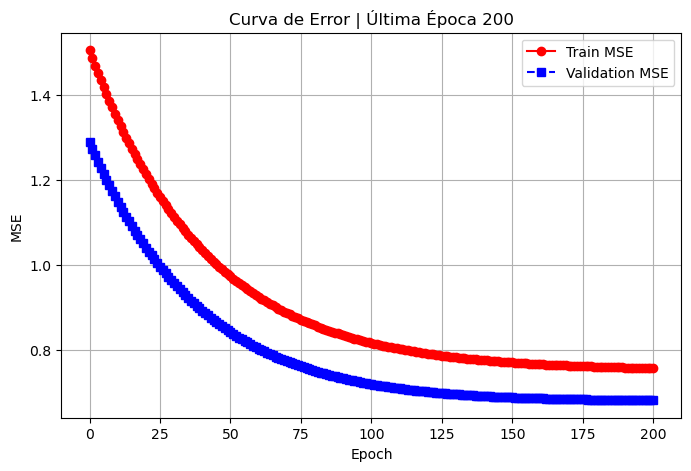

Época 250:
   → Loss (Train) = 0.75239
   → Loss (Valid) = 0.68044


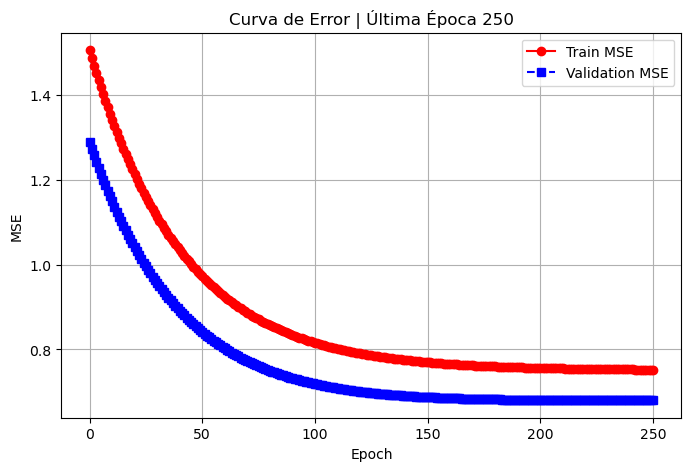

Época 300:
   → Loss (Train) = 0.75122
   → Loss (Valid) = 0.68105


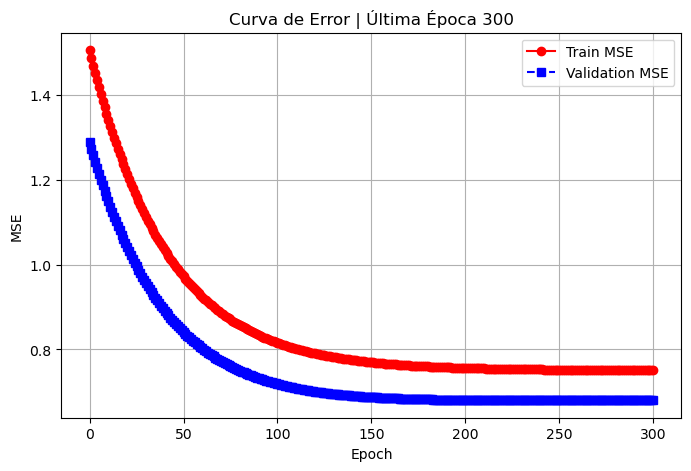

Época 350:
   → Loss (Train) = 0.75088
   → Loss (Valid) = 0.68164


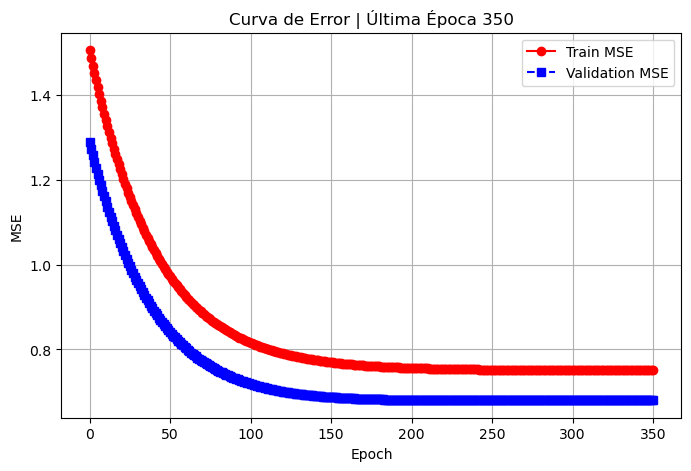

In [55]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.006, plot_cada_n=50)
#testear(w, b, X1_test, y1_test)

## Correr training con selección de features #2: Epochs 400 y Alfa: 0.0000001

Valores iniciales:, B = 0.10478, W = [0.23857198 0.11990242]
Época 0:
   → Loss (Train) = 0.79824
   → Loss (Valid) = 0.69452


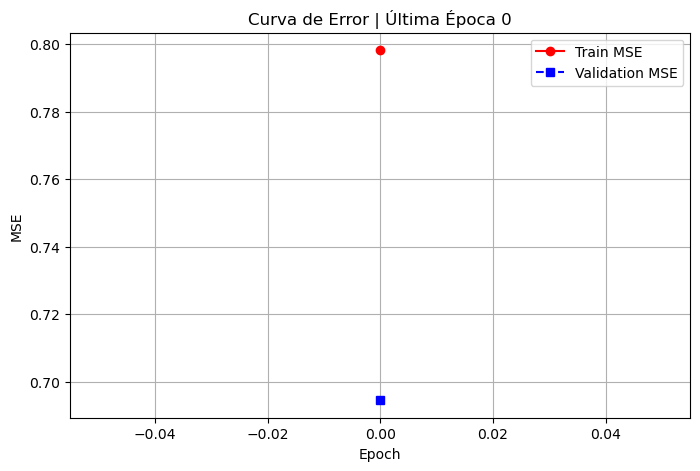

Época 50:
   → Loss (Train) = 0.60755
   → Loss (Valid) = 0.53640


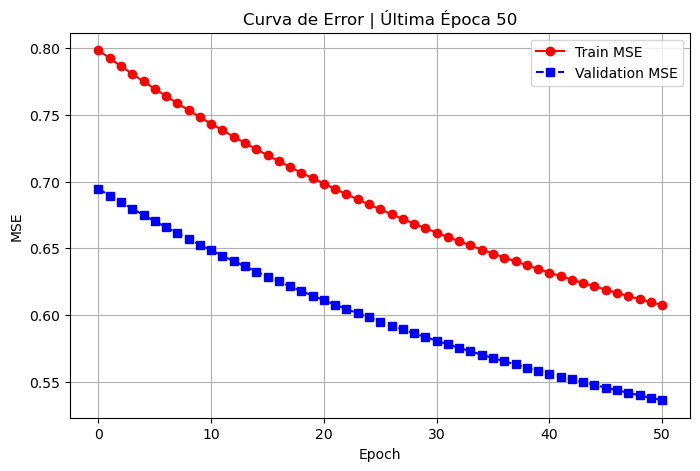

Época 100:
   → Loss (Train) = 0.53856
   → Loss (Valid) = 0.48120


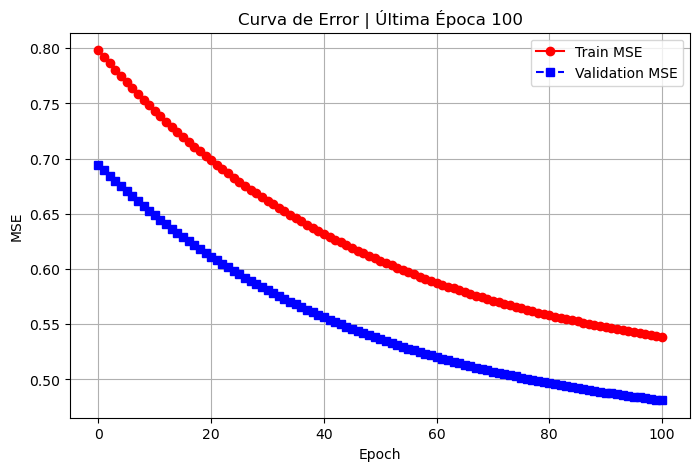

Época 150:
   → Loss (Train) = 0.51360
   → Loss (Valid) = 0.46243


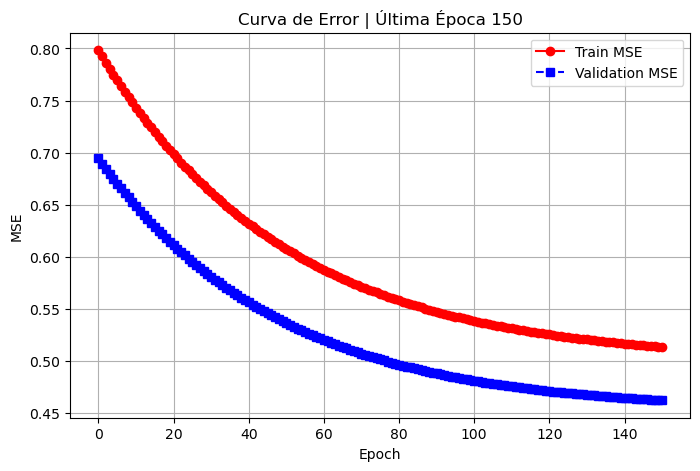

Época 200:
   → Loss (Train) = 0.50457
   → Loss (Valid) = 0.45637


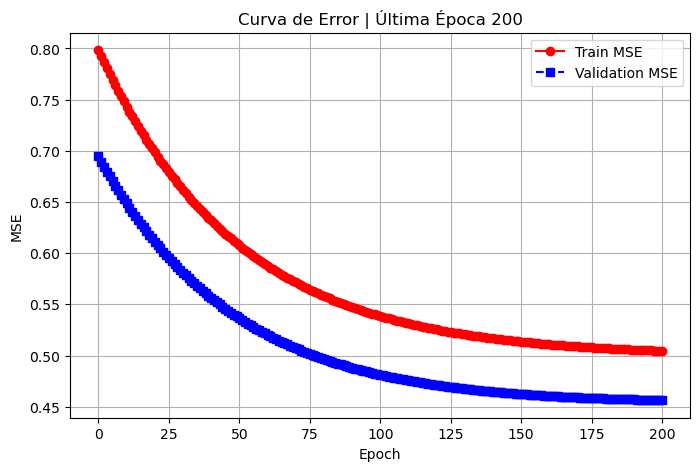

Época 250:
   → Loss (Train) = 0.50130
   → Loss (Valid) = 0.45461


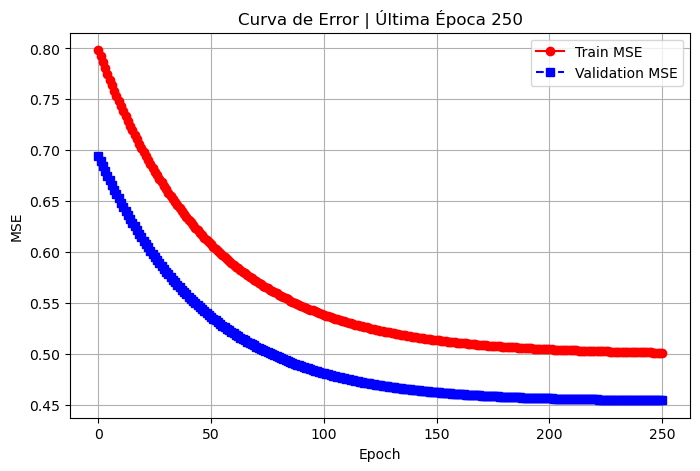

Época 300:
   → Loss (Train) = 0.50012
   → Loss (Valid) = 0.45423


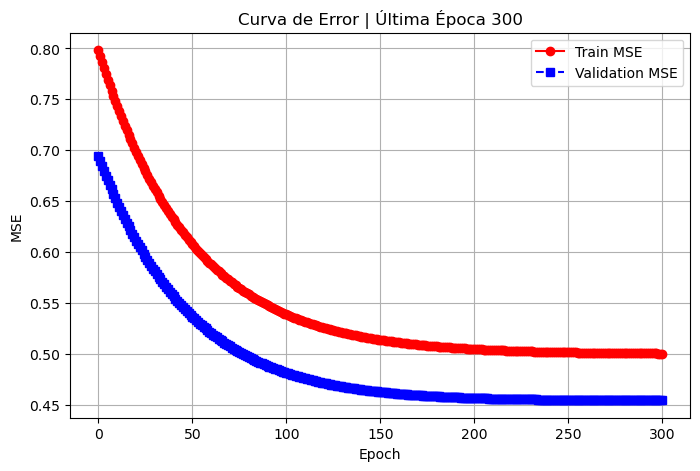

Época 350:
   → Loss (Train) = 0.49969
   → Loss (Valid) = 0.45425


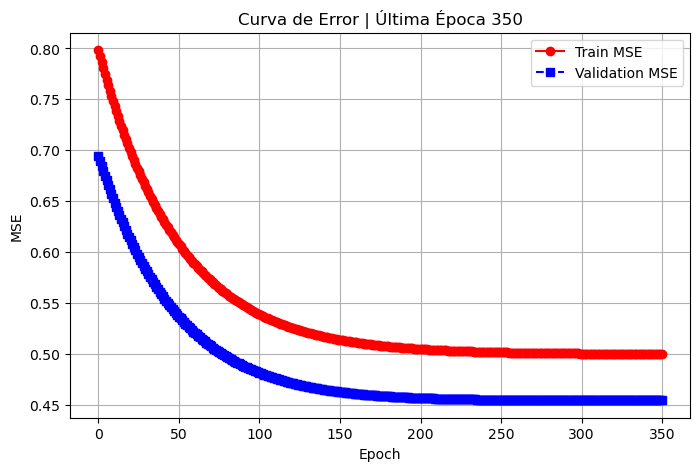

Valor de función de perdida (Loss Function) para testing = 0.52136


In [56]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=400, alfa=0.005, plot_cada_n=50)
testear(w, b, X2_test, y2_test)